In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
# scipi is a library for statistical tests and visualizations 
from scipy import stats
from scipy.stats.mstats import winsorize
# random enables us to generate random numbers
import random
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [255]:
df = pd.read_csv('../data/df_cleaned.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,141381703,43,45,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,133716286,48,58,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,140003974,94,91,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,800840817,116,125,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,303236322,84,87,144,A,Minor,65,23,80,14,63,11,6


In [256]:
df['released_year'].value_counts()

released_year
2022    399
2023    175
2021    118
2020     37
2019     36
2017     23
2016     18
2013     13
2014     13
2015     11
2012     10
2018     10
2011     10
2010      7
2002      6
1999      5
2004      4
1984      4
2000      4
1958      3
1963      3
2008      2
1985      2
1975      2
1995      2
2003      2
1986      2
1991      2
1959      2
1982      2
1957      2
1992      1
2007      1
1968      1
1930      1
1994      1
1997      1
1973      1
1983      1
1952      1
1970      1
1971      1
1950      1
1979      1
1946      1
1942      1
2005      1
1996      1
1998      1
1987      1
Name: count, dtype: int64

In [257]:
#drop rows that are not released_year == 2022, 2023, 2021
df = df[df['released_year'].isin([2022,2023,2021])]

df['released_year'].value_counts()

released_year
2022    399
2023    175
2021    118
Name: count, dtype: int64

In [258]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
streams                  0
in_apple_playlists       0
in_deezer_playlists      0
bpm                      0
key                     67
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [259]:
df = df.drop(columns={'key'})

In [260]:
df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
streams                 0
in_apple_playlists      0
in_deezer_playlists     0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [261]:
df.eq(0).sum()

track_name                0
artist(s)_name            0
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
streams                   0
in_apple_playlists       15
in_deezer_playlists       0
bpm                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%           40
instrumentalness_%      640
liveness_%                0
speechiness_%             0
dtype: int64

In [262]:
df = df.drop(columns={'instrumentalness_%'})

In [263]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
streams                  int64
in_apple_playlists       int64
in_deezer_playlists     object
bpm                      int64
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [309]:
#which columns do we not need? 
    #artist_count
    #released_month 
    #released_day 
    #in_spotify_charts 
    #in_shazam_charts 
    #in_apple_charts
    #mode 
#df = df.drop(columns={'artist_count', 'released_month', 'released_day', 'mode'})

In [313]:
df['streams'].describe()

count    6.920000e+02
mean     3.094651e+08
std      3.184833e+08
min      2.762000e+03
25%      1.162870e+08
50%      2.075996e+08
75%      3.667788e+08
max      2.665344e+09
Name: streams, dtype: float64

In [320]:
df.loc[df['streams'] <= 30000000]

,track_name,artist(s)_name,released_year,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
30,Rush,Troye Sivan,2023,864,22581161,71,50,126,74,35,84,0,11,6
58,S91,Karol G,2023,525,16011326,34,39,128,86,42,72,59,9,19
68,Overdrive,Post Malone,2023,410,14780425,36,31,140,56,48,73,0,35,4
104,New Jeans,NewJeans,2023,77,29562220,8,4,134,81,53,72,51,12,5
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2022,763,2762,21,21,162,49,78,64,19,11,4
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2023,293,11956641,5,30,133,93,68,65,42,12,25
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",2023,437,11599388,17,26,97,79,92,89,5,6,5
248,Danger (Spider) (Offset & JID),"Offset, JID",2023,214,24975653,3,6,143,83,25,69,4,23,12
391,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",2022,138,1365184,13,2,105,82,62,74,10,33,7


(array([206., 215., 115.,  51.,  33.,  23.,  12.,   8.,   7.,  12.,   4.,
          1.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([2.76200000e+03, 1.33269820e+08, 2.66536878e+08, 3.99803936e+08,
        5.33070994e+08, 6.66338052e+08, 7.99605110e+08, 9.32872168e+08,
        1.06613923e+09, 1.19940628e+09, 1.33267334e+09, 1.46594040e+09,
        1.59920746e+09, 1.73247452e+09, 1.86574157e+09, 1.99900863e+09,
        2.13227569e+09, 2.26554275e+09, 2.39880981e+09, 2.53207686e+09,
        2.66534392e+09]),
 <BarContainer object of 20 artists>)

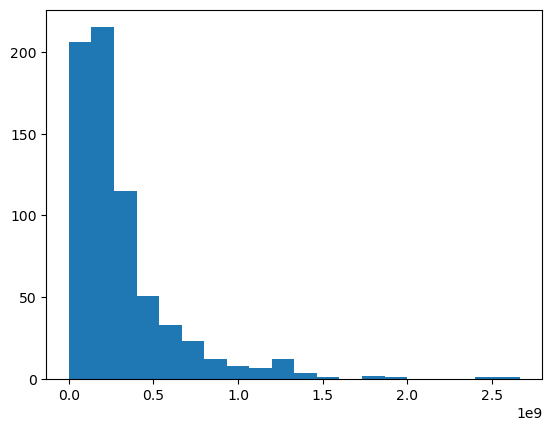

In [289]:
#choose dependent variable 
    #streams 

plt.hist(df['streams'], bins =20, range=(df['streams'].min(), df['streams'].max()))

In [290]:
df['streams'].describe()

count    6.920000e+02
mean     3.094651e+08
std      3.184833e+08
min      2.762000e+03
25%      1.162870e+08
50%      2.075996e+08
75%      3.667788e+08
max      2.665344e+09
Name: streams, dtype: float64

In [332]:
df = df.loc[df['streams'] >= 3e+08]
#df.loc[df['streams'] > 0]

In [333]:
df.corr(numeric_only=True)

,released_year,in_spotify_playlists,streams,in_apple_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
released_year,1.000000,-0.257716,-0.266993,-0.193933,-0.049600,0.034348,0.047760,0.034538,0.026065,0.019170,-0.056369
in_spotify_playlists,-0.257716,1.000000,0.812251,0.886327,0.078203,-0.009984,0.046466,0.113206,-0.088369,-0.046450,-0.058272
streams,-0.266993,0.812251,1.000000,0.716923,0.119654,-0.111258,-0.019652,0.015828,0.028703,0.016621,-0.062988
in_apple_playlists,-0.193933,0.886327,0.716923,1.000000,0.097195,0.009237,0.134177,0.168780,-0.123577,-0.055503,-0.102081
bpm,-0.049600,0.078203,0.119654,0.097195,1.000000,-0.242945,0.069592,-0.133686,0.119642,-0.082573,0.096174
danceability_%,0.034348,-0.009984,-0.111258,0.009237,-0.242945,1.000000,0.420826,0.300699,-0.364032,-0.051305,0.151740
valence_%,0.047760,0.046466,-0.019652,0.134177,0.069592,0.420826,1.000000,0.391424,-0.152755,0.017561,0.065636
energy_%,0.034538,0.113206,0.015828,0.168780,-0.133686,0.300699,0.391424,1.000000,-0.492269,0.116231,0.066598
acousticness_%,0.026065,-0.088369,0.028703,-0.123577,0.119642,-0.364032,-0.152755,-0.492269,1.000000,-0.006957,-0.021617
liveness_%,0.019170,-0.046450,0.016621,-0.055503,-0.082573,-0.051305,0.017561,0.116231,-0.006957,1.000000,0.009498


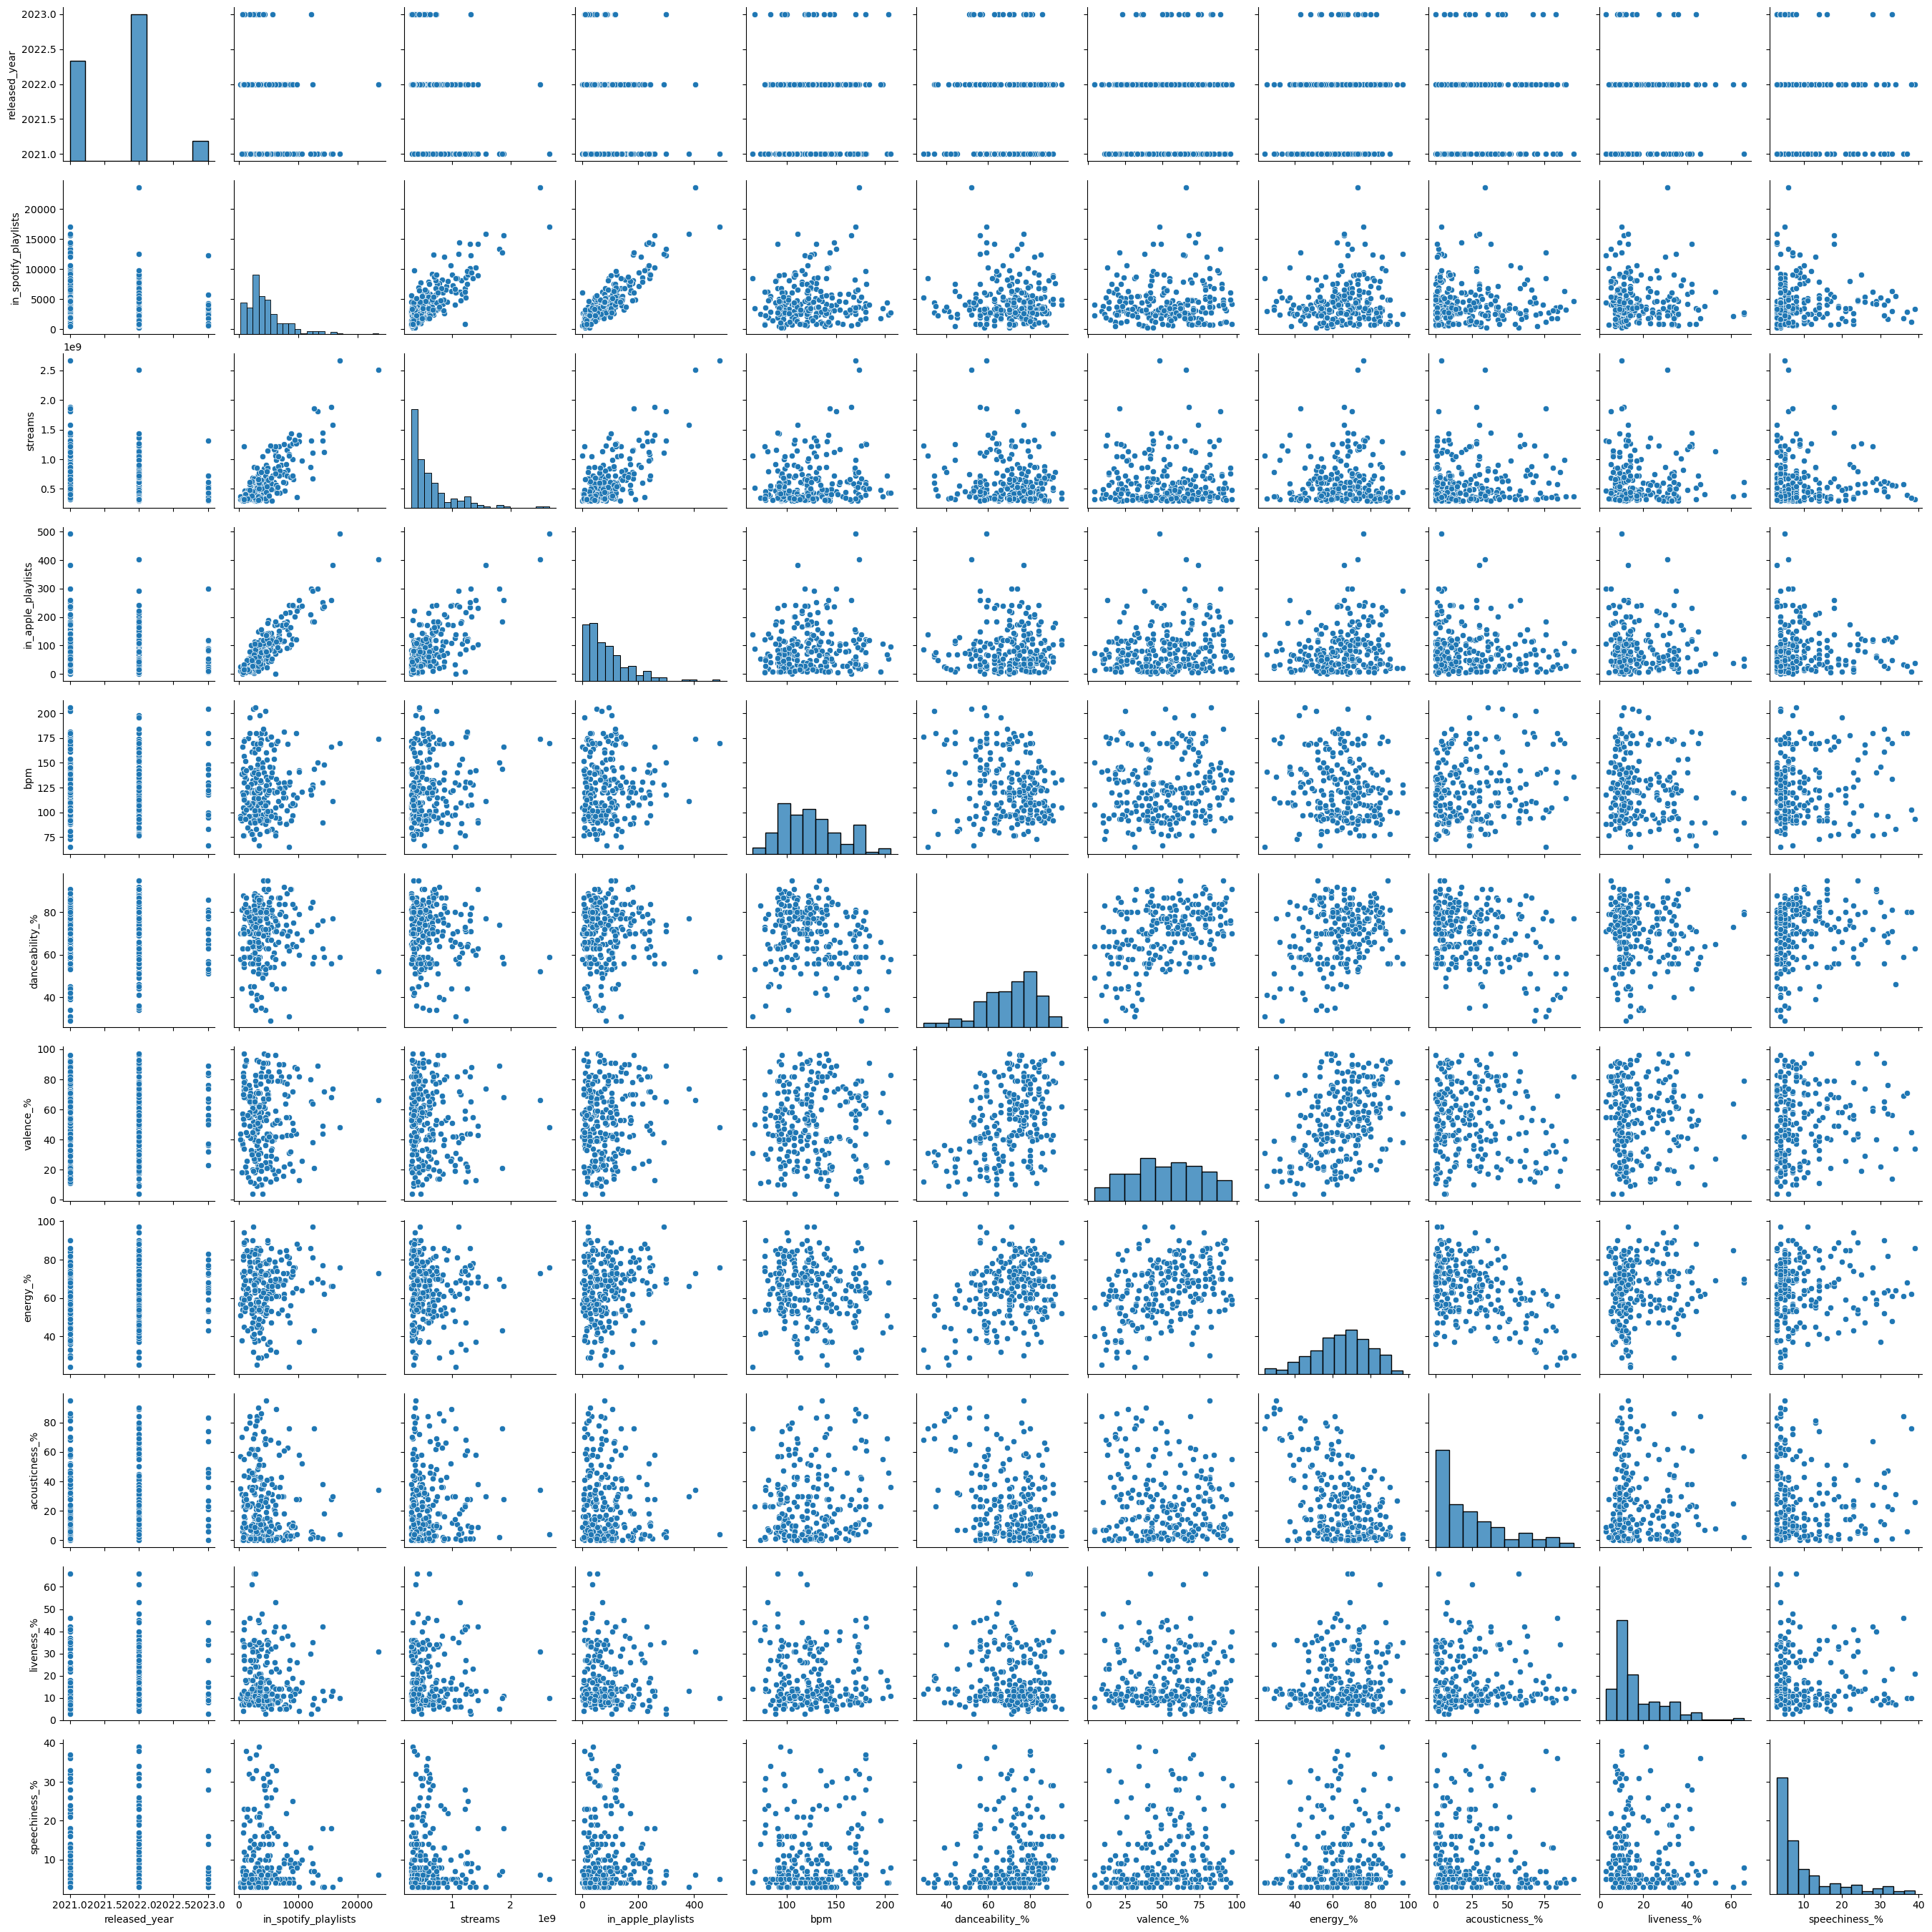

In [334]:
sns.pairplot(df)

<Axes: >

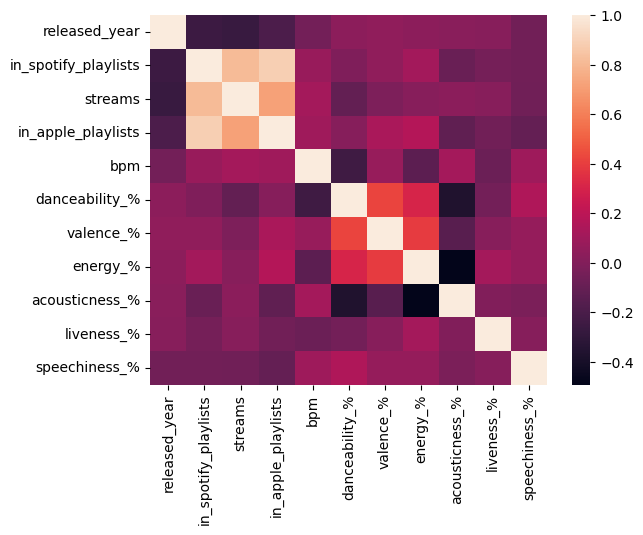

In [335]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='valence_%', ylabel='danceability_%'>

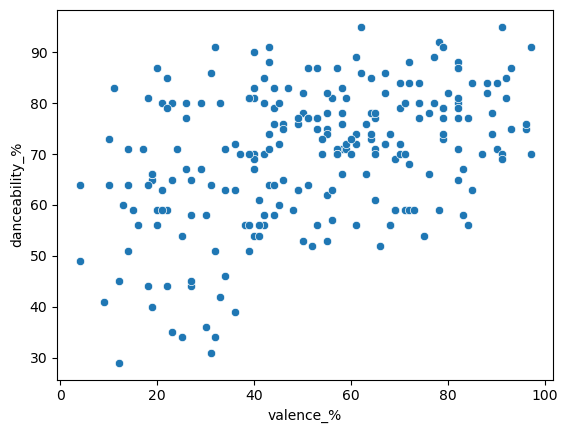

In [338]:
sns.scatterplot(x= 'valence_%', y = 'danceability_%', data = df)

<Axes: xlabel='valence_%', ylabel='danceability_%'>

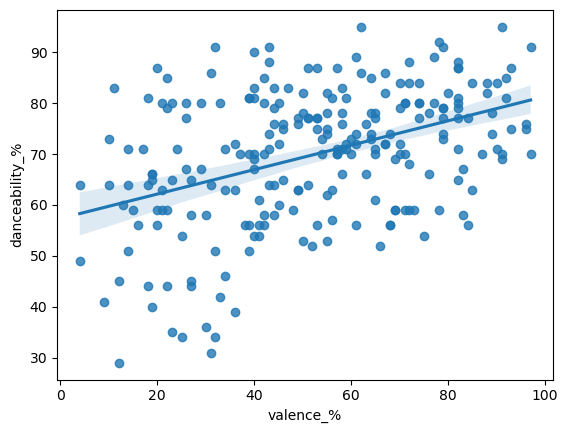

In [339]:
sns.regplot(x= 'valence_%', y = 'danceability_%', data = df)

In [340]:
X = df[['valence_%']].values
y = df[['danceability_%']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =42)

In [341]:
print(X_train.shape, X_test.shape , y_train.shape , y_test.shape)

(177, 1) (60, 1) (177, 1) (60, 1)


In [342]:
rModel = linear_model.LinearRegression()

In [343]:
rModel.fit(X_train, y_train)

LinearRegression()

In [344]:
print(rModel.score(X_train, y_train))

0.20556438438968205


In [345]:
y_pred = rModel.predict(X_test)

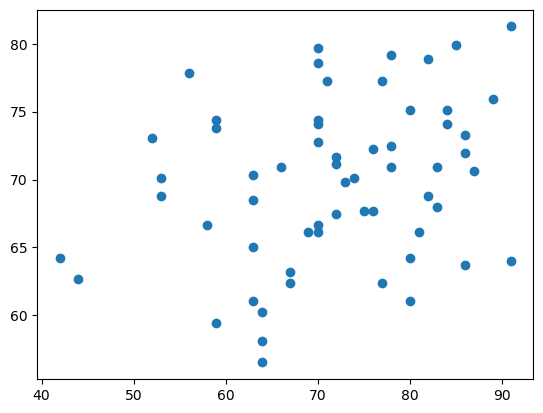

In [346]:
plt.scatter(y_test,y_pred)

In [347]:
X = df[['valence_%']].values
X = sm.add_constant(X)

In [348]:
y = df[['danceability_%']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [349]:
rModel2 = sm.OLS(y_train, X_train)
rModel2_results = rModel2.fit()

In [350]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     36.34
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           9.55e-09
Time:                        13:34:14   Log-Likelihood:                -685.52
No. Observations:                 177   AIC:                             1375.
Df Residuals:                     175   BIC:                             1381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.6680      2.288     24.768      0.000      52.153      61.184
x1             0.2390      0.040      6.029      0.000       0.161       0.317
==============================================================================
Omnibus:                        2.772   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.831
Skew:                          -0.289   Prob(JB):                        0.243
Kurtosis:                       2.778   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#no strong correlations between independent and dependent variables